In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, silhouette_score
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

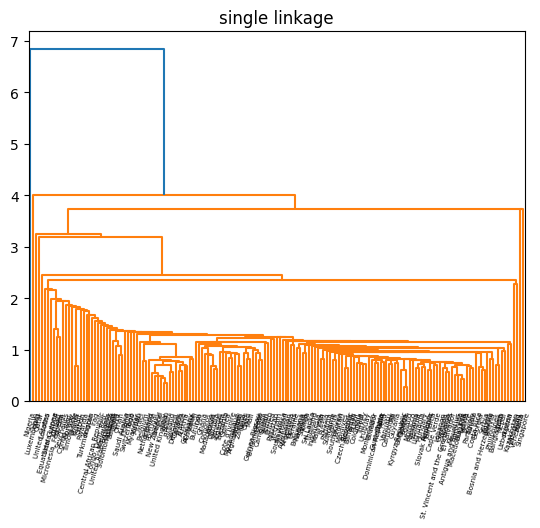

Best no. of clusters: 2
Best Score: 0.3153134331018189


In [22]:
df = pd.read_csv('Country-data.csv', index_col=0)

scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
link = "single"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings,
           labels=list(df_scaled.index))
plt.xticks(rotation = 75)
plt.title(link+" linkage")
plt.show()

Ks = [2,3,4,5]
scores = []
for i in Ks:
    clust = AgglomerativeClustering(n_clusters=i)
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

In [23]:
clust = AgglomerativeClustering(n_clusters=2)
clust.fit(df_scaled)

AgglomerativeClustering()

In [24]:
from sklearn.decomposition import PCA

print(clust.labels_)

pca = PCA().set_output(transform='pandas')
principalComponents = pca.fit_transform(df_scaled)
print(pca.explained_variance_ratio_ * 100)

[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
[45.95173979 17.18162565 13.0042589  11.05316181  7.34021142  2.48423468
  1.2604304   0.98128174  0.74305562]


In [25]:
principalComponents['Clust'] = clust.labels_
principalComponents['Clust'] = principalComponents['Clust'].astype(str)

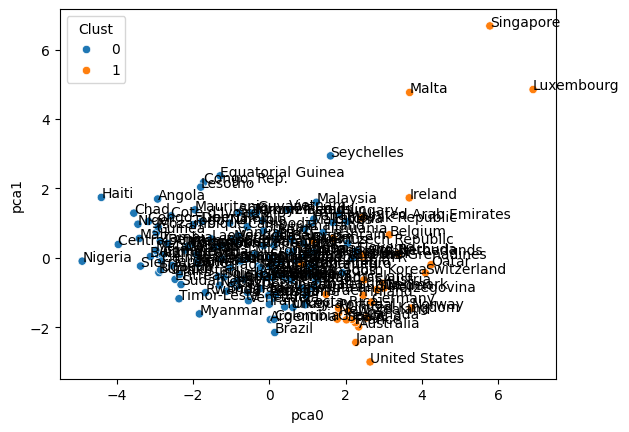

In [26]:
sns.scatterplot(data=principalComponents, x='pca0', y='pca1',
                hue='Clust')
for i in np.arange(0, df.shape[0]):
    plt.text(principalComponents.values[i,0],
             principalComponents.values[i,1],
             list(df.index)[i])
plt.show()